<a href="https://colab.research.google.com/github/Rayckey/3DHelper/blob/master/Lab_1_Feedback_Loops_and_Oscillations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Throughout this course, you have seen systems that oscillate. The
purpose of this lab is to take a closer look at such systems and to
review important Python functions used for simulation and plotting.

# A Predator-Prey Model

Previously, we studied and simulated the Lotka-Volterra predator-prey
model (which you initially saw as the "shark-tuba model"). Now, we will study a different predator-prey model, termed the Holling-Tanner model, that incorporates somewhat different (and more realistic) biological assumptions.

As before, we will call our prey population $N$ and our predator
population $P$. We will assume that, in the absence of predators, the
prey population would grow logistically. The expression for this is the familiar
$rN(1-\frac{N}{k})$.

We also want an individual predator’s consumption rate to plateau as $N$
increases so that there is a limit to how much predators can eat. This
can be done with the function $f(N)=\frac{C_{max}N}{N+h}$, where
$C_{max}$ is a predator’s maximum consumption rate and $h$ is the
half-saturation density, the prey density at which consumption is half
the maximum rate.

We can make plots by using `np.linspace` to generate a set of x values and then writing a formula for the y values. We then use the pyplot function `plot` to generate the plot. Here is an example that plots $f(X) = \frac{X^4}{625+X^4}$.

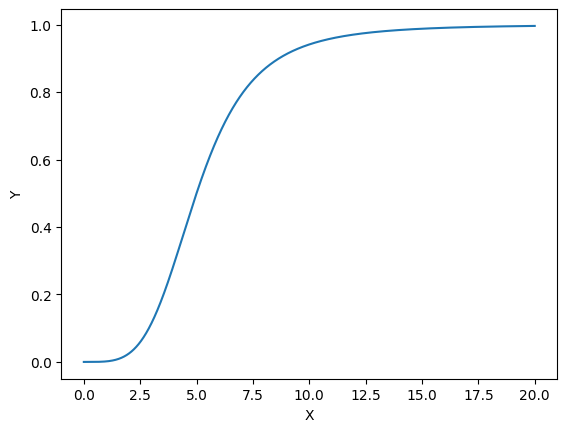

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x= np.linspace(0,20,10000)
y = (x**4)/(625+ x**4)

plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<font color='green'><u><b> Exercise 1.</b></u></font> Plot $\frac{C_{max}N}{N+h}$ for different values of $C_{max}$ and
$h$ (at least two values per parameter), changing one value at a time. $N$ values ranging up to 5 work well. You can put your plots on the same or different axes, but make sure to label which graph is which. Also, label your axes.

In [ ]:
#write code here

<font color='green'><u><b> Exercise 2.</b></u></font> Briefly describe how $C_{max}$ and $h$ affect the function.

In [ ]:
#write text here

We will assume that the predator population also grows logistically.
However, its carrying capacity is set by the prey population. We then
have the system of equations $$N'=r_{1}N(1-\frac{N}{K})-\frac{wN}{D+N}P$$
$$P'=r_{2}P(1-\frac{PJ}{N}).$$ You will now study the dynamics of this model.

<font color='green'><u><b> Exercise 3.</b></u></font> Using `sympy.abc`,  make $N$ and $P$ available as symbolic variables. Assign the following values to the model’s parameters: $r_{1}=1$, $r_{2}=0.1$ $K=7$, $D=1$, $J=1$, and $w=0.3$. Then, type out the change equations and assign them to variables.

In [ ]:
#write code here

We can generate a vector field for this system using the `quiver` function from `PyPlot`. This gives an overall picture of its behavior.

<font color='green'><u><b> Exercise 4.</b></u></font> Copy your parameter values and change equations into the cell below and fill in the other blanks to view the vector field. Make sure your axes are correctly labeled.

In [ ]:
#Create a grid of N and P values to determine where to put change vectors
N, P = np.meshgrid(np.linspace(0.1, 10, 20), np.linspace(0.1, 10, 20))


#Copy parameter values and change equations here


#Plotting code
plt.quiver(N, P, Nprime, Pprime, color="g")
plt.xlabel("__XLABEL__")
plt.ylabel("__YLABEL__")
plt.show()

<font color='green'><u><b> Exercise 5.</b></u></font> Why did we start plotting at 0.1 instead of 0? HINT: Look at the change equations.

In [ ]:
#Explain here

To simulate a system of differential equations, we need to use the
function `odeint` from `scipy.integrate`. As you may recall from LS 30A, your code will need to include the following components.

1.   Import `odeint` from `scipy.integrate`.
2.   Write a function that takes in state values and a list of times and generates a list of the rates of change of all our state variables.
3.   Use `odeint` to run the simulation, giving it the change equation function, initial values, and time steps as inputs.
4.   Plot the results as a time series or trajectory.



Here is an example that simulates a Lotka-Volterra predator-prey system (which we often call "shark-tuna" in LS 30) and plots a time series of the result.


```
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#parameters
br=0.6
dr=0.5
beta=0.04

#change equations
def odes(state_values, t):
  T, S = state_values
  Tprime= br*T - beta*S*T
  Sprime= beta*S*T - dr*S
  return [Tprime, Sprime]

#the simulation itself
t=np.linspace(0,100,1000) #time values
sv = [16,30] #initial values
sol=odeint(odes, sv, t) #simulates the model

#plotting
plt.plot(t, sol[:,0], label="Tuna", color="blue") #plot the tuna
plt.plot(t, sol[:,1], label="Sharks", color="red") #plot the sharks
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Populations")
plt.show()
```

<font color='green'><u><b> Exercise 6.</b></u></font>  Simulate the Lotka-Volterra model in the example for at least two different initial conditions and plot the time series. **NOTE:** In this exercise and all others where you have to plot multiple simulation results, assign each to a different variable (`sol1=odeint(odes, sv1, t)`, `sol2`=odeint(odes, sv2, t), ...) so you can use them all later.

In [ ]:
#run Lotka-Volterra model in example

<font color='green'><u><b> Exercise 7.</b></u></font>  Do the same thing for the Holling-Tanner model described in this lab. For your convenience, the equations are

$$N'=r_{1}N(1-\frac{N}{K})-\frac{wN}{D+N}P$$
$$P'=r_{2}P(1-\frac{PJ}{N})$$

with  $r_{1}=1$, $r_{2}=0.1$ $K=7$, $D=1$, $J=1$, and $w=0.3$.

Try at least two different initial conditions (relatively close to the ones provided for the Lotka-Volterra model).

In [ ]:
#simulate Holling-Tanner model defined above

<font color='green'><u><b> Exercise 8.</b></u></font> Plot trajectories for both the Lotka-Volterra and the Holling-Tanner models.

In [ ]:
#plot trajectories

<font color='green'><u><b> Exercise 9.</b></u></font> In a sentence or two, compare the behavior of the two models. How are they different?

In [ ]:
#write text here

As $w$ increases, the behavior of the Holling-Tanner model changes.

<font color='green'><u><b> Exercise 10.</b></u></font> Set $w$ to 1 and simulate the Holling-Tanner model for three different initial conditions. Pick at least one initial condition near (2,2) and at least one relatively far away. Plot a time series for each.

In [ ]:
#simulate with w=1 for 3 initial conditions & plot time series

<font color='green'><u><b> Exercise 11.</b></u></font> Describe what you observe in the time series. How are they different from the ones generated with $w=0.3$?

In [ ]:
#write text here

<font color='green'><u><b> Exercise 12.</b></u></font> Plot a vector field for the Holling-Tanner model with $w=1$. Then, plot trajectories from your simulations and overlay them on the vector field.

In [ ]:
#plot vector field with trajectories on top

<font color='green'><u><b> Exercise 13.</b></u></font> Compare these trajectories to both the ones for Lotka-Volterra and the ones from Holling-Tanner with $w=0.3$. For each, describe the key differences. Make sure to comment on how different initial conditions affect model behavior.

In [ ]:
#write text here